In [12]:
import pandas as pd
import numpy as np

In [13]:
ruta = r'C:/Users/eduar/numpy/TelecomX_Data.json'

In [14]:
data = pd.read_json(ruta)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [16]:
data.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [25]:
data['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)

In [26]:
data.customerID.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)

In [31]:
data['customerID'].apply(pd.Series)

,0
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


###📌 Extracción

In [32]:
data['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [34]:
# Ejemplo de cómo se extraería si fuera un diccionario anidado
data['Facturacion_Mensual'] = data['account'].str['Charges'].str['Monthly']

# Asegurarnos de que Pandas lo lea como número (float)
data['Facturacion_Mensual'] = data['Facturacion_Mensual'].astype(float)

In [35]:
data.dtypes

customerID              object
Churn                   object
customer                object
phone                   object
internet                object
account                 object
Facturacion_Mensual    float64
dtype: object

In [36]:
data.head()

,customerID,Churn,customer,phone,internet,account,Facturacion_Mensual
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",65.6
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",59.9
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",73.9
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",98.0
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",83.9


In [37]:
# 1. Extraemos los datos de cada columna con diccionarios
df_customer = pd.json_normalize(data['customer'])
df_phone = pd.json_normalize(data['phone'])
df_internet = pd.json_normalize(data['internet'])
df_account = pd.json_normalize(data['account'])

In [38]:
# 2. Unimos todo junto con las columnas que ya estaban bien (customerID y Churn)
data_limpia = pd.concat([data[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [39]:
data_limpia.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [40]:
# Convertimos Charges.Total a numérico (float). 
data_limpia['Charges.Total'] = pd.to_numeric(data_limpia['Charges.Total'], errors='coerce')

# Verificamos los cambios
data_limpia[['tenure', 'Charges.Monthly', 'Charges.Total']].dtypes

tenure               int64
Charges.Monthly    float64
Charges.Total      float64
dtype: object

In [42]:
data_limpia.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [43]:
# Esto mostrará una lista de tus columnas y cuántos valores nulos tiene cada una
data_limpia.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [44]:
data_limpia['Charges.Total'] = data_limpia['Charges.Total'].ffill()

In [45]:
data_limpia['Cuentas_Diarias'] = round(data_limpia['Charges.Monthly'] / 30, 2)

In [47]:
data_limpia[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.19
1,0003-MKNFE,59.9,2.00
2,0004-TLHLJ,73.9,2.46
3,0011-IGKFF,98.0,3.27
4,0013-EXCHZ,83.9,2.80


In [48]:
# Muestra los valores únicos de todas las columnas de texto sin usar ciclos
data_limpia.select_dtypes(include=['object']).agg('unique')

array(['', '0002-ORFBO', '0003-MKNFE', ..., 'One year', 'Two year', 'Yes'],
      shape=(7283,), dtype=object)

In [49]:
# Muestra los valores únicos separados por columna, manteniendo un código limpio y sin ciclos
data_limpia.select_dtypes(include=['object']).apply(lambda x: x.unique())

customerID          [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...
Churn                                                     [No, Yes, ]
gender                                                 [Female, Male]
Partner                                                     [Yes, No]
Dependents                                                  [Yes, No]
PhoneService                                                [Yes, No]
MultipleLines                             [No, Yes, No phone service]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [Yes, No, No internet service]
StreamingTV                            [Yes, No, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

#🔧 Transformación

In [50]:
# Contamos exactamente cuántas veces aparece cada categoría, incluyendo los espacios
data_limpia['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [51]:
# 1. ELIMINAR INCONSISTENCIAS: Quitamos los espacios y filtramos los vacíos en Churn
data_limpia['Churn'] = data_limpia['Churn'].str.strip()
data_limpia = data_limpia[data_limpia['Churn'] != '']

In [52]:
# 2. BINARIZAR: Transformamos Yes/No a 1/0 en todo el DataFrame
data_limpia = data_limpia.replace({'Yes': 1, 'No': 0})

C:\Users\eduar\AppData\Local\Temp\ipykernel_15668\3414687454.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_limpia = data_limpia.replace({'Yes': 1, 'No': 0})


In [53]:
# Binarizar también el género (Femenino = 1, Masculino = 0)
data_limpia['gender'] = data_limpia['gender'].replace({'Female': 1, 'Male': 0})


C:\Users\eduar\AppData\Local\Temp\ipykernel_15668\101660988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_limpia['gender'] = data_limpia['gender'].replace({'Female': 1, 'Male': 0})


In [54]:
# 3. TRADUCIR: Renombramos las columnas para mayor claridad
traduccion_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Fuga',
    'gender': 'Genero',
    'tenure': 'Meses_Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total'
}

In [55]:
data_limpia = data_limpia.rename(columns=traduccion_columnas)

In [56]:
data_limpia.head()

,ID_Cliente,Fuga,Genero,SeniorCitizen,Partner,Dependents,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [57]:
# Generamos un resumen estadístico de todas nuestras columnas numéricas
data_limpia.describe()

,Fuga,Genero,SeniorCitizen,Partner,Dependents,Meses_Antiguedad,Servicio_Telefonico,Factura_Digital,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.151264,2.158675
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.110652,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.675000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.300000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.975000,2.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [63]:
data_limpia.max(numeric_only=True)

Fuga                      1.00
Genero                    1.00
SeniorCitizen             1.00
Partner                   1.00
Dependents                1.00
Meses_Antiguedad         72.00
Servicio_Telefonico       1.00
Factura_Digital           1.00
Cargo_Mensual           118.75
Cargo_Total            8684.80
Cuentas_Diarias           3.96
dtype: float64

In [65]:
data_limpia.mean(numeric_only=True)

Fuga                      0.265370
Genero                    0.495244
SeniorCitizen             0.162147
Partner                   0.483033
Dependents                0.299588
Meses_Antiguedad         32.371149
Servicio_Telefonico       0.903166
Factura_Digital           0.592219
Cargo_Mensual            64.761692
Cargo_Total            2283.151264
Cuentas_Diarias           2.158675
dtype: float64

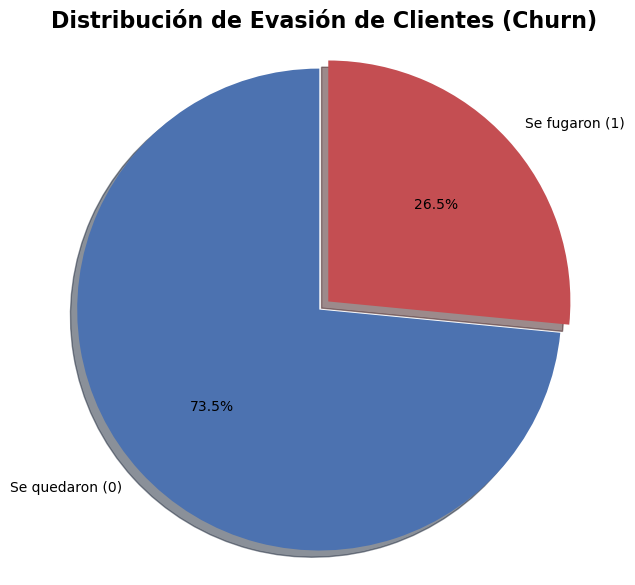

In [74]:
import matplotlib.pyplot as plt

# 1. Obtenemos los conteos
fuga_conteos = data_limpia['Fuga'].value_counts()

# 2. Configuramos el tamaño y colores
plt.figure(figsize=(7, 7))
colores = ['#4C72B0', '#C44E52']
etiquetas = ['Se quedaron (0)', 'Se fugaron (1)']

# 3. Creamos el gráfica
plt.pie(fuga_conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, 
        colors=colores, explode=(0, 0.05), shadow=True)

# 4. Título y ajustes
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=16, fontweight='bold')
plt.axis('equal') 

# 5. Mostramos la obra de arte
plt.show()

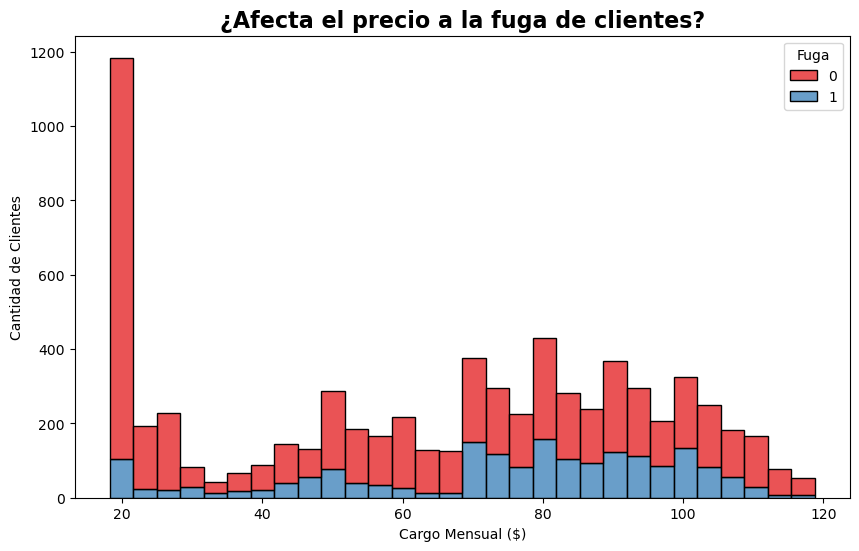

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ajustamos el tamaño del lienzo
plt.figure(figsize=(10, 6))

# 2. Creamos un histograma. 
# x = la variable que queremos medir (dinero)
# hue = la variable que separará los colores (si se fugó o no)
sns.histplot(data=data_limpia, x='Cargo_Mensual', hue='Fuga', multiple="stack", palette="Set1", bins=30)

# 3. Títulos y etiquetas para que se vea profesional
plt.title('¿Afecta el precio a la fuga de clientes?', fontsize=16, fontweight='bold')
plt.xlabel('Cargo Mensual ($)')
plt.ylabel('Cantidad de Clientes')

# 4. Mostrar gráfico
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_15668\2052749705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_limpia, x='Fuga', y='Meses_Antiguedad', palette='Set2')


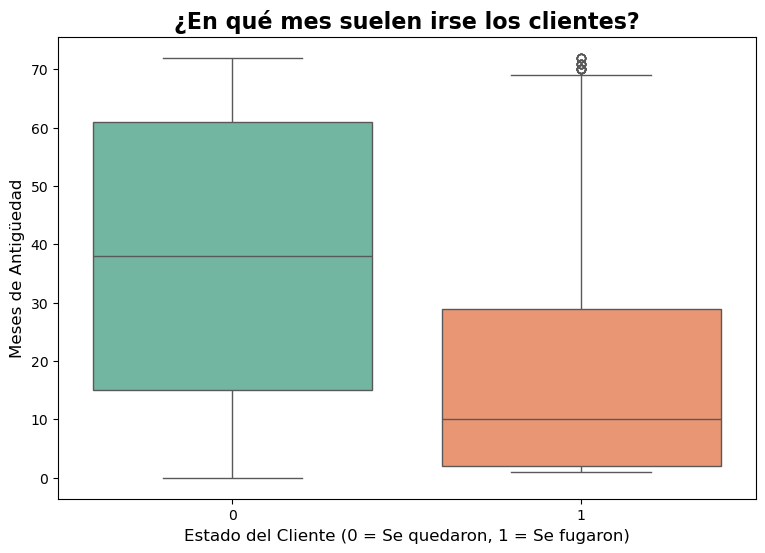

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ajustamos el tamaño del lienzo
plt.figure(figsize=(9, 6))

# 2. Creamos el Gráfico de Cajas (Boxplot)
# En el eje X ponemos la Fuga (0 o 1) y en el eje Y los meses que llevan en la empresa
sns.boxplot(data=data_limpia, x='Fuga', y='Meses_Antiguedad', palette='Set2')

# 3. Títulos y etiquetas para que sea fácil de leer
plt.title('¿En qué mes suelen irse los clientes?', fontsize=16, fontweight='bold')
plt.xlabel('Estado del Cliente (0 = Se quedaron, 1 = Se fugaron)', fontsize=12)
plt.ylabel('Meses de Antigüedad', fontsize=12)

# 4. Mostramos el gráfico
plt.show()

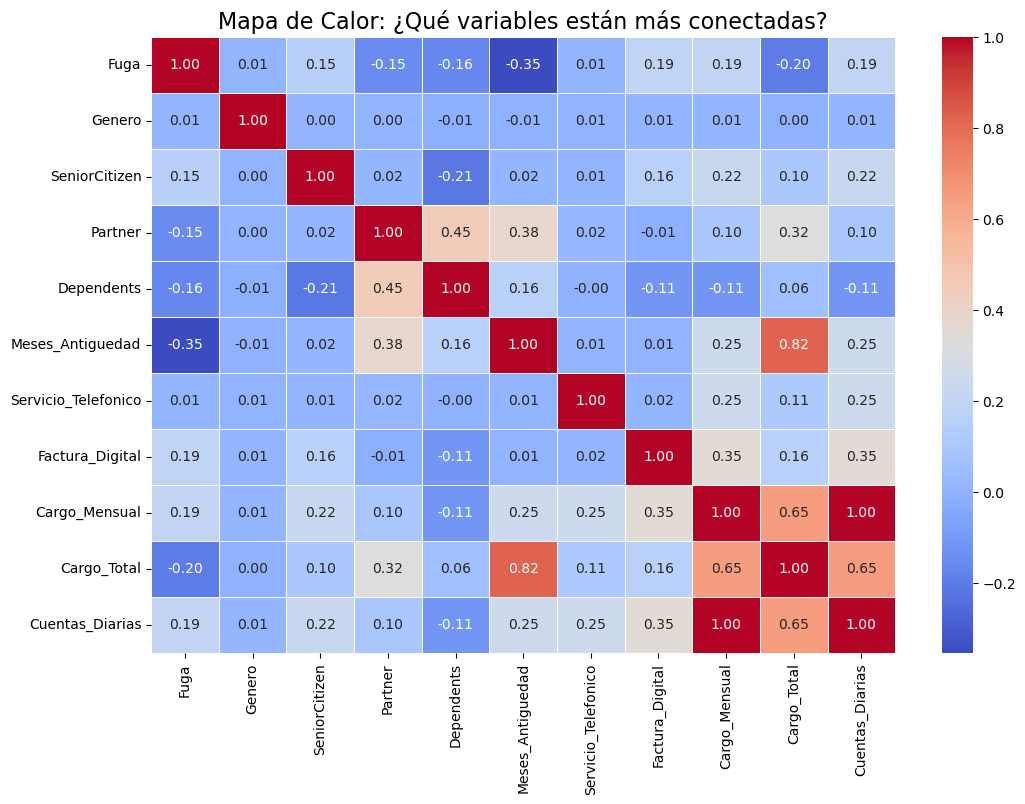

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la correlación (solo de números)
corr = data_limpia.corr(numeric_only=True)

# 2. Configuramos el lienzo
plt.figure(figsize=(12, 8))

# 3. Creamos el Heatmap
# annot=True pone los números dentro de los cuadritos
# cmap='coolwarm' pone azul para lo negativo y rojo para lo positivo
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# 4. Título
plt.title('Mapa de Calor: ¿Qué variables están más conectadas?', fontsize=16)

plt.show()

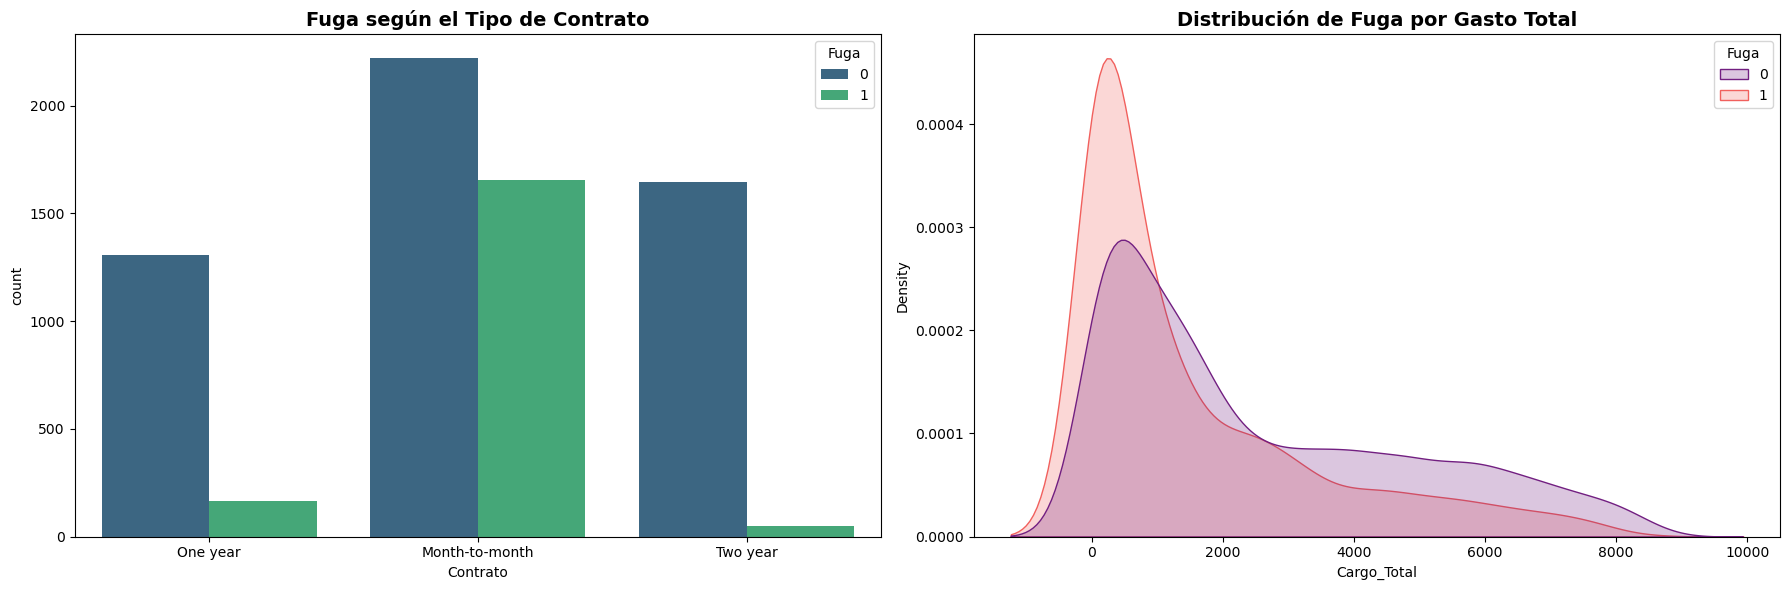

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un lienzo con dos gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# 1. PARA LA TARJETA CATEGÓRICA: El impacto del contrato
#
sns.countplot(data=data_limpia, x='Contrato', hue='Fuga', palette='viridis', ax=ax[0])
ax[0].set_title('Fuga según el Tipo de Contrato', fontsize=14, fontweight='bold')

# 2. PARA LA TARJETA NUMÉRICA: El impacto del Cargo Total
#
sns.kdeplot(data=data_limpia, x='Cargo_Total', hue='Fuga', fill=True, common_norm=False, palette='magma', ax=ax[1])
ax[1].set_title('Distribución de Fuga por Gasto Total', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#📄Informe final

1. ¿Que esta pasando? (Introduccion)
El problema principal de la empresa es que se nos esta llendo mucha gente. Tenemos una tasa de "Churn" (fuga) del 26.5%. Basicamente, de cada 10 clientes que entran, casi 3 se van. El objetivo aca es entender por que pasa esto.

2. Limpieza y orden de los datos
Para que el analisis sea real, primero tuvimos que arreglar el desorden:

Quitamos 224 clientes que tenian la celda de Fuga bacia porque no servian para el calculo.

Cambiamos los "Yes" y "No" por 1 y 0 para poder hacer graficos y cuentas matematicas.

Pasamos los nombres de las columnas al español para que cualquiera pueda leer la tabla sin problemas.

3. ¿Que descubrimos? (Analisis EDA)
Despues de ver varios graficos, bimos patrones muy claros:

El Precio: Los que pagan facturas de mas de $70 dolares son los que mas se fugan. Los planes baratos son mucho mas estables.

El Tiempo: La "zona de peligro" es el primer año. La mayoria se va antes de los 10 meses. Si pasan los 2 años, ya se quedan.

Contratos: Los que tienen contrato "Mes a mes" se ban muchisimo mas que los que firman por 1 o 2 años.

4. Conclusiones e Insights
El resumen es que la fuga no es al azar. Los clientes se van si sienten que el servicio es caro y si no tienen un compromiso a largo plazo. El primer año es clave para retenerlos.

5. Recomendaciones (¿Que hacemos ahora?)
Ganchos de retencion: Dar promos o descuentos a los clientes que llevan menos de un año para que no se vyan tan rapido.

Empujar contratos largos: Ofrecer algun beneficio si el cliente cambia su contrato de "mes a mes" a uno anual.

Foco en el segmento caro: Revisar que les estamos dando a los que pagan mas de $70, por que ahi es donde perdemos mas plata.